In [1]:
# Import Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from ta.volatility import BollingerBands
from ta.momentum import RSIIndicator
from ta.others import daily_return,cumulative_return
from plotly.offline import init_notebook_mode
import cufflinks as cf
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import os
import requests
from bs4 import BeautifulSoup
import warnings
from tqdm.auto import tqdm

warnings.filterwarnings("ignore")
%matplotlib inline
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
# Webscrapping Wikipedia table to get the SP500 components
page = requests.get("https://en.wikipedia.org/wiki/Swiss_Market_Index")
soup = BeautifulSoup(page.text, 'html.parser') 
table = soup.find('table', class_="wikitable sortable")

In [3]:
# Convert html table to dataframe
wiki = pd.read_html(str(table))
wiki = pd.concat(wiki)
wiki.head(40)

,Rank,Name,Industry,Ticker,Canton,Weighting in %
0,1,Nestlé SA,Food,NESN.SW,Vaud,19[1]
1,2,Roche Holding AG,Pharmacy,ROG.SW,Basel,17[1]
2,3,Novartis International AG,Pharmacy,NOVN.SW,Basel,17[1]
3,4,Compagnie Financière Richemont SA,Luxury Goods,CFR.SW,Geneva,7[1]
4,5,Zurich Insurance Group AG,Insurance,ZURN.SW,Zurich,6[1]
5,6,UBS Group AG,Banks,UBSG.SW,Zurich/Basel,5[1]
6,7,ABB Ltd,Electrical equipment,ABBN.SW,Zurich,4[1]
7,8,Lonza Group AG,Chemistry,LONN.SW,Basel,4[1]
8,9,Sika AG,Chemistry,SIKA.SW,Zug,3[1]
9,10,Alcon Inc,Pharmacy,ALC.SW,Fribourg,3[1]


In [4]:
# Get the data for the stock
index_list = wiki['Ticker'].tolist()
index_list.append('^SSMI')

In [5]:
# Save all the historical data
for stock in tqdm(index_list):
    data = yf.download(stock, progress=False)
    data.to_csv(f"../input/{stock}.csv",index=True)

  0%|          | 0/21 [00:00<?, ?it/s]

In [6]:
# Configuration of different parameters of the notebook
ticker = '^SSMI'
year = '2024'

In [7]:
# Check DataFrame
stock_ticker = pd.read_csv(f"../input/{ticker}.csv",index_col="Date",parse_dates=True)
stock_ticker.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-11-09,1378.900024,1389.000000,1375.300049,1387.099976,1387.099976,0
1990-11-12,1388.099976,1408.099976,1388.099976,1407.500000,1407.500000,0
1990-11-13,1412.199951,1429.400024,1411.400024,1415.199951,1415.199951,0
1990-11-14,1413.599976,1413.599976,1402.099976,1410.300049,1410.300049,0
1990-11-15,1410.599976,1416.699951,1405.099976,1405.699951,1405.699951,0
1990-11-16,1405.699951,1407.400024,1389.400024,1395.199951,1395.199951,0
1990-11-19,1395.599976,1417.900024,1395.599976,1416.000000,1416.000000,0
1990-11-20,1414.800049,1415.000000,1404.699951,1405.800049,1405.800049,0
1990-11-21,1405.599976,1405.599976,1396.699951,1398.400024,1398.400024,0


In [8]:
# Check DataFrame tail
stock_ticker.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-17,12004.879883,12046.389648,11992.419922,12037.990234,12037.990234,29601100
2024-05-21,12039.400391,12050.290039,11972.589844,12001.500000,12001.500000,25924100
2024-05-22,11981.860352,11993.950195,11929.559570,11958.669922,11958.669922,21430800
2024-05-23,11959.599609,12016.030273,11945.589844,11966.750000,11966.750000,24435700
2024-05-24,11885.620117,11942.490234,11857.089844,11931.700195,11931.700195,19902700
2024-05-27,11919.480469,11961.250000,11915.379883,11960.570312,11960.570312,14585200
2024-05-28,11982.759766,11986.530273,11835.459961,11854.500000,11854.500000,20113900
2024-05-29,11815.740234,11841.610352,11783.620117,11793.730469,11793.730469,21516800
2024-05-30,11777.780273,11885.919922,11771.879883,11869.900391,11869.900391,22327200


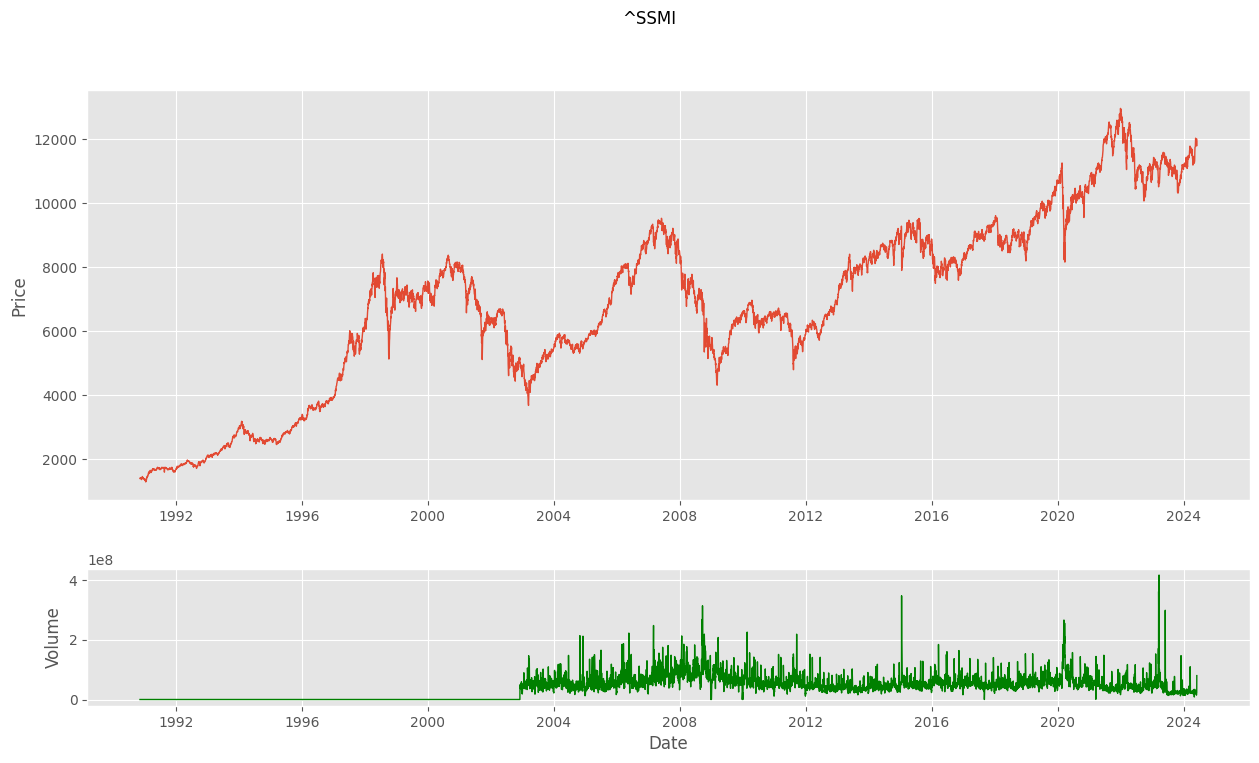

In [9]:
# Plot the adjusted close price
plt.style.use('ggplot')
fig, axs = plt.subplots(2,1,gridspec_kw={'height_ratios': [3,1],'hspace':0.25},figsize=(15, 8),sharex=True)

fig.suptitle(f"{ticker}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'],linewidth=1)
axs[0].tick_params(labelbottom=True)

axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].plot(stock_ticker['Volume'],linewidth=1,color='g')

plt.show()

In [10]:
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':3,'colspan':1}],[None],[None],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Adj Close'],mode="lines",name=f"{ticker}"),row=1, col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker.index,y=stock_ticker['Volume'],mode="lines",name='Volume'),row=4, col=1)
fig.update_yaxes(title_text="Volume", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker}")

fig.show()

In [11]:
# Add Technical Analysis Indicators

# Modified Moving Average 20
stock_ticker['MMA20'] = stock_ticker['Adj Close'].loc[year].rolling(20).mean() #Adj Close 20 MA

# Initialize Bollinger Bands Indicator
indicator_bb = BollingerBands(close=stock_ticker["Adj Close"].loc[year], window=20, window_dev=2)

# Bollinger Bands
stock_ticker['BB_Upper'] = indicator_bb.bollinger_hband()
stock_ticker['BB_Lower'] = indicator_bb.bollinger_lband()

# Initialize RSI Indicator
indicator_rsi = RSIIndicator(close=stock_ticker["Adj Close"].loc[year], window=14)

# RSI
stock_ticker['RSI'] = indicator_rsi.rsi()

# Daily Return
stock_ticker['Daily_Return'] = daily_return(stock_ticker["Adj Close"].loc[year])

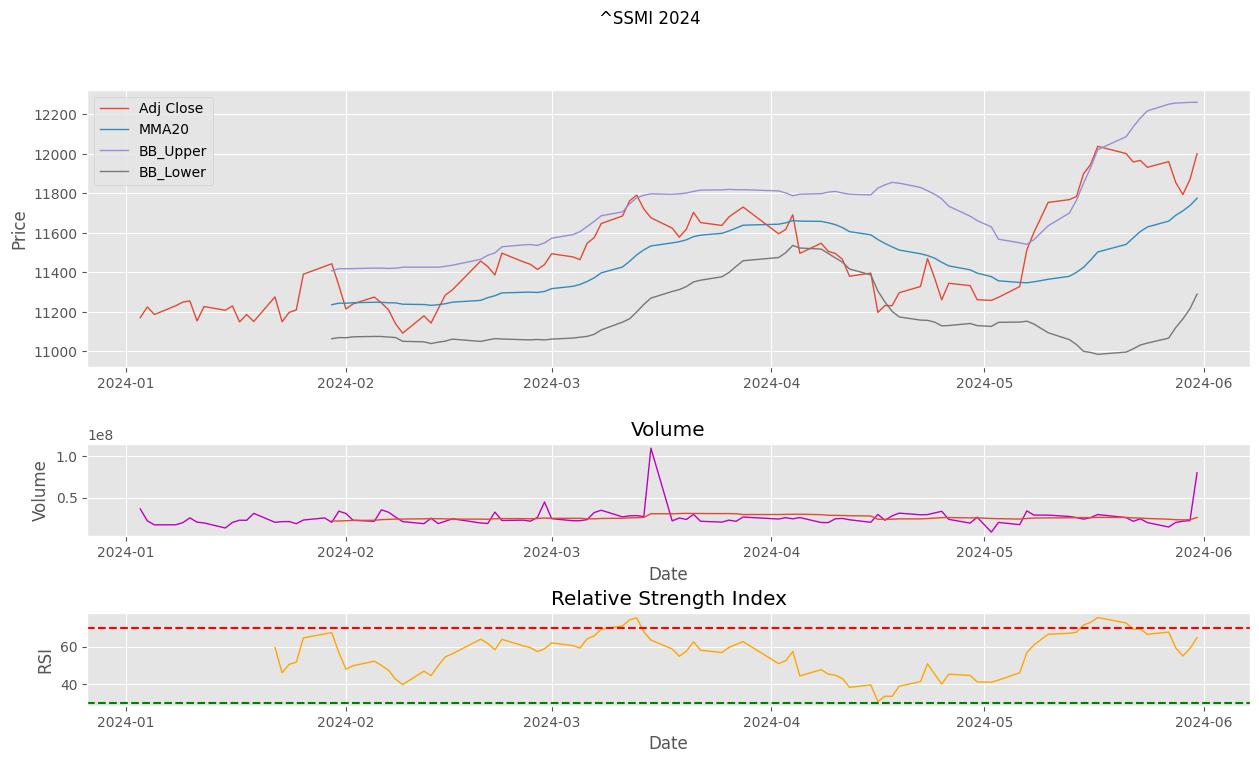

In [12]:
# Plot the adjusted close price
fig, axs = plt.subplots(3,1,gridspec_kw={'height_ratios': [3,1,1],'hspace':0.5},figsize=(15, 8),sharex=True)

# Graph 0
fig.suptitle(f"{ticker} {year}")
axs[0].set_ylabel('Price')
axs[0].plot(stock_ticker['Adj Close'].loc[year],linewidth=1)
axs[0].plot(stock_ticker['MMA20'],linewidth=1) 
axs[0].plot(stock_ticker['BB_Upper'],linewidth=1)
axs[0].plot(stock_ticker['BB_Lower'],linewidth=1)
axs[0].legend(['Adj Close','MMA20','BB_Upper','BB_Lower'])
axs[0].tick_params(labelbottom=True)

# Graph 1
axs[1].set_ylabel("Volume")
axs[1].set_xlabel("Date")
axs[1].set_title('Volume')
axs[1].plot(stock_ticker['Volume'].loc[year],linewidth=1,color='m')
axs[1].plot(stock_ticker['Volume'].loc[year].rolling(20).mean(),linewidth=1) #Volume 20 MMA
axs[1].tick_params(labelbottom=True)

# Graph 2
axs[2].set_title('Relative Strength Index')
axs[2].set_ylabel("RSI")
axs[2].set_xlabel("Date")
axs[2].plot(stock_ticker['RSI'],color='orange',linewidth=1)
# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
axs[2].axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
axs[2].axhline(70, linestyle='--', linewidth=1.5, color='red')

plt.show()

In [13]:
# Plot the adjusted close price
fig = make_subplots(rows=4, cols=1,shared_xaxes=True,vertical_spacing=0.01,specs=[[{'rowspan':2,'colspan':1}],[None],[{'rowspan':1,'colspan':1}],[{'rowspan':1,'colspan':1}]])

# Graph (1,1)
fig.add_trace(go.Scatter(x=stock_ticker['Adj Close'].loc[year].index,y=stock_ticker['Adj Close'].loc[year],mode="lines",name=f'{ticker}'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Lower'].loc[year].index,y=stock_ticker['BB_Lower'].loc[year],mode="lines",name='BB_Lower'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['BB_Upper'].loc[year].index,y=stock_ticker['BB_Upper'].loc[year],mode="lines",name='BB_Upper'),row=1,col=1)
fig.add_trace(go.Scatter(x=stock_ticker['MMA20'].loc[year].index,y=stock_ticker['MMA20'].loc[year],mode="lines",name='MMA20'),row=1,col=1)
# Update xaxis properties
fig.update_yaxes(title_text="Price", row=1, col=1)

# Graph (3,1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year],mode="lines",name='Volume'),row=3, col=1)
fig.add_trace(go.Scatter(x=stock_ticker['Volume'].loc[year].index,y=stock_ticker['Volume'].loc[year].rolling(20).mean(),mode="lines",name='MMA20'),row=3,col=1)
fig.update_yaxes(title_text="Volume", row=3, col=1)

# Graph (4,1)
fig.add_trace(go.Scatter(x=stock_ticker['RSI'].loc[year].index,y=stock_ticker['RSI'].loc[year],mode="lines",name='RSI'),row=4, col=1)
fig.add_hline(y=30, line_width=1, line_dash="dash", line_color="green",row=4,col=1)
fig.add_hline(y=70, line_width=1, line_dash="dash", line_color="red",row=4,col=1)
fig.update_yaxes(title_text="RSI", row=4, col=1)

fig.update_layout(height=800, width=1300,showlegend=False,title=f"{ticker} {year}")

fig.show()

In [14]:
stock_ticker.tail(10)

,Open,High,Low,Close,Adj Close,Volume,MMA20,BB_Upper,BB_Lower,RSI,Daily_Return
Date,,,,,,,,,,,
2024-05-17,12004.879883,12046.389648,11992.419922,12037.990234,12037.990234,29601100,11502.792627,12021.250523,10984.334731,75.370257,0.764482
2024-05-21,12039.400391,12050.290039,11972.589844,12001.500000,12001.500000,25924100,11541.346143,12087.018746,10995.673539,72.455003,-0.303126
2024-05-22,11981.860352,11993.950195,11929.559570,11958.669922,11958.669922,21430800,11574.459619,12136.780456,11012.138782,69.077691,-0.356873
2024-05-23,11959.599609,12016.030273,11945.589844,11966.750000,11966.750000,24435700,11606.408643,12181.498994,11031.318291,69.367781,0.067567
2024-05-24,11885.620117,11942.490234,11857.089844,11931.700195,11931.700195,19902700,11629.536133,12217.740470,11041.331796,66.455417,-0.292893
2024-05-27,11919.480469,11961.250000,11915.379883,11960.570312,11960.570312,14585200,11659.027637,12251.502960,11066.552313,67.659836,0.241961
2024-05-28,11982.759766,11986.530273,11835.459961,11854.500000,11854.500000,20113900,11688.722119,12257.400044,11120.044194,59.243449,-0.886833
2024-05-29,11815.740234,11841.610352,11783.620117,11793.730469,11793.730469,21516800,11711.192627,12258.785283,11163.599971,55.020679,-0.512628
2024-05-30,11777.780273,11885.919922,11771.879883,11869.900391,11869.900391,22327200,11738.069629,12260.853596,11215.285662,58.968495,0.645851


  0%|          | 0/21 [00:00<?, ?it/s]

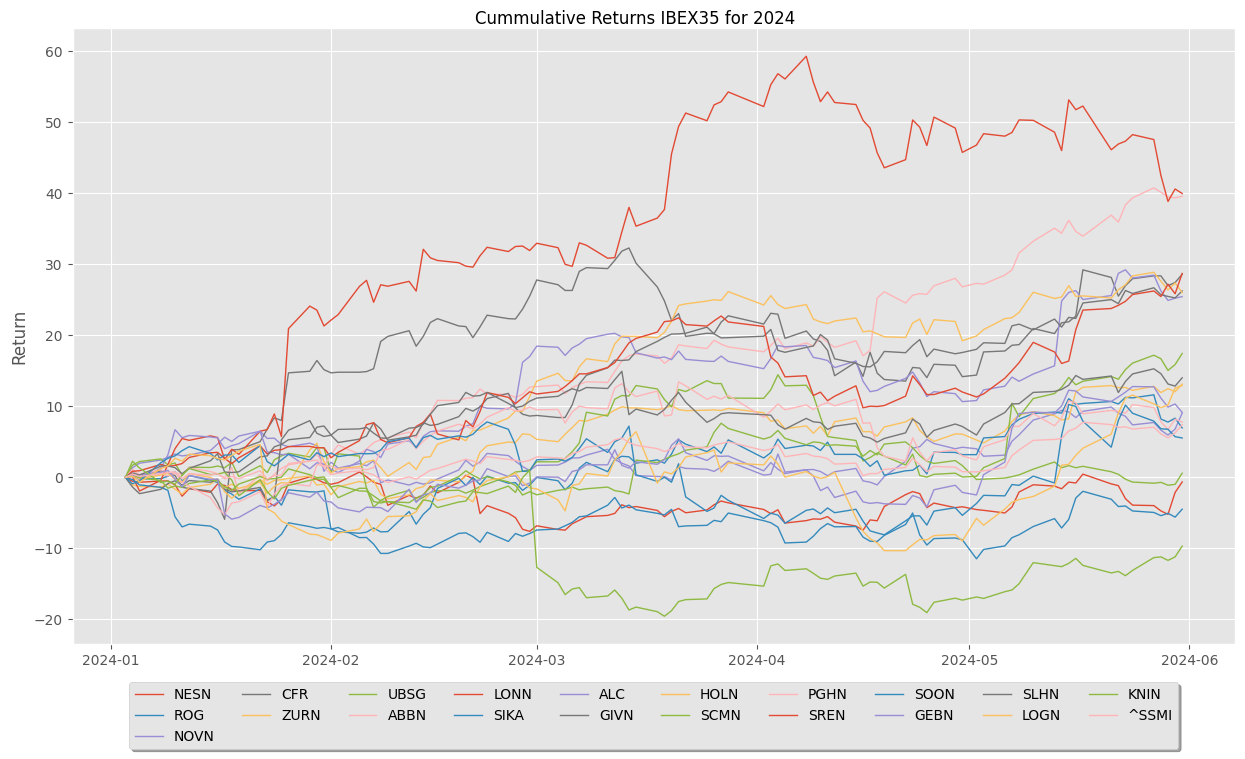

In [15]:
# Plot Cummulative Returns
fig, axs = plt.subplots(figsize=(15, 8))

# Graph
fig.suptitle(f"Cummulative Returns IBEX35 for {year}")
axs.set_ylabel('Return')
labels = []

# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    axs.plot(df['Cummulative_Return'].loc[year],linewidth=1)
    labels.append(stock.split('.')[0])

# Shrink current axis's height by 10% on the bottom
box = axs.get_position()
axs.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height])

# Put a legend below current axis
axs.legend(labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=10)

plt.show()

In [16]:
# Plotly
fig = make_subplots()

# Graph (1,1)
# Loop all stock files and get cummulative return for year
for stock in tqdm(index_list):
    f = os.path.join("../input", stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    fig.add_trace(go.Scatter(x=df['Cummulative_Return'].loc[year].index,y=df['Cummulative_Return'].loc[year],mode="lines",name=stock.split('.')[0]),row=1,col=1)

# Update xaxis properties
fig.update_yaxes(title_text="Return", row=1, col=1)

fig.update_layout(height=800, width=1300,showlegend=True,title=f"Cummulative Returns {ticker} for {year}")

fig.show()

  0%|          | 0/21 [00:00<?, ?it/s]

In [17]:
# Create also table of cummulative returns
list = []

for stock in tqdm(index_list):
    f = os.path.join("../input",stock)
    df = pd.read_csv(f+".csv",index_col="Date",parse_dates=True)
    df['Cummulative_Return'] = cumulative_return(df["Adj Close"].loc[year])
    list.append([df.loc[year].tail(1).index.item(),stock.split('.csv')[0],df["Cummulative_Return"].loc[year].iloc[-1]])


cum = pd.DataFrame(list, columns=['Date','Ticker','Cummulative_Return'])
cum = wiki[['Ticker','Name']].merge(cum,on='Ticker')
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False)


  0%|          | 0/21 [00:00<?, ?it/s]

,Ticker,Name,Date,Cummulative_Return
0,LONN.SW,Lonza Group AG,2024-05-31,39.995933
1,ABBN.SW,ABB Ltd,2024-05-31,39.603412
2,SREN.SW,Swiss Reinsurance Company Ltd,2024-05-31,28.735365
3,CFR.SW,Compagnie Financière Richemont SA,2024-05-31,28.616074
4,GIVN.SW,Givaudan SA,2024-05-31,26.271065
5,HOLN.SW,Holcim Limited,2024-05-31,26.049583
6,ALC.SW,Alcon Inc,2024-05-31,25.467334
7,UBSG.SW,UBS Group AG,2024-05-31,17.464265
8,SLHN.SW,Swiss Life Holding AG,2024-05-31,14.032726
9,ZURN.SW,Zurich Insurance Group AG,2024-05-31,13.151913


In [18]:
cum.sort_values(by=['Cummulative_Return'],ignore_index=True, ascending=False).head(30)

,Ticker,Name,Date,Cummulative_Return
0,LONN.SW,Lonza Group AG,2024-05-31,39.995933
1,ABBN.SW,ABB Ltd,2024-05-31,39.603412
2,SREN.SW,Swiss Reinsurance Company Ltd,2024-05-31,28.735365
3,CFR.SW,Compagnie Financière Richemont SA,2024-05-31,28.616074
4,GIVN.SW,Givaudan SA,2024-05-31,26.271065
5,HOLN.SW,Holcim Limited,2024-05-31,26.049583
6,ALC.SW,Alcon Inc,2024-05-31,25.467334
7,UBSG.SW,UBS Group AG,2024-05-31,17.464265
8,SLHN.SW,Swiss Life Holding AG,2024-05-31,14.032726
9,ZURN.SW,Zurich Insurance Group AG,2024-05-31,13.151913
